In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


In [2]:
structures = ['adipocyte', 'stroma', 'bone', 'sinusoid', 'macrophage', 'art']

In [4]:
cls = 'celltype'

In [5]:
combined_df = None
for structure in structures:
    tmp_df = pd.read_csv('result/{}/{}/data.csv'.format(structure, cls), index_col=0)
    tmp_df['structure'] = structure
    
    if combined_df is None:
        combined_df = tmp_df
    else:
        combined_df = combined_df.append(tmp_df)
# change art to arterial in structure
combined_df.loc[combined_df['structure'] == 'art', 'structure'] = 'arterial'

/var/folders/pb/4g5084r100s8w6wd7bhb142r0000gn/T/ipykernel_1480/1671095087.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(tmp_df)
/var/folders/pb/4g5084r100s8w6wd7bhb142r0000gn/T/ipykernel_1480/1671095087.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(tmp_df)
/var/folders/pb/4g5084r100s8w6wd7bhb142r0000gn/T/ipykernel_1480/1671095087.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(tmp_df)
/var/folders/pb/4g5084r100s8w6wd7bhb142r0000gn/T/ipykernel_1480/1671095087.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df =

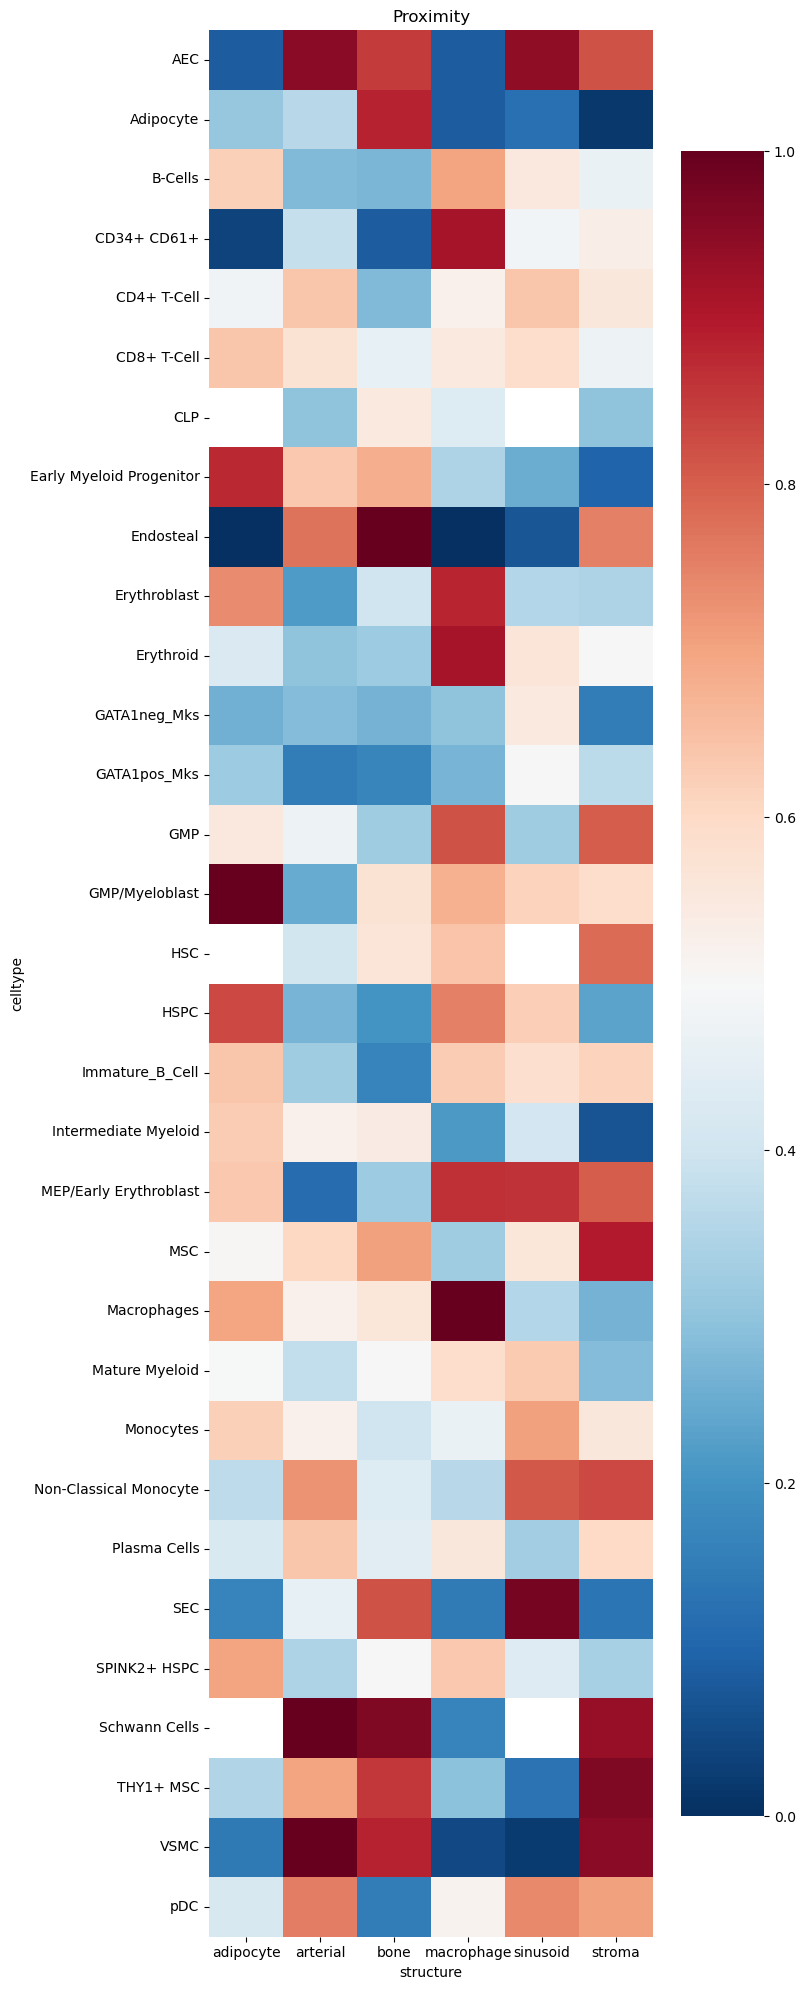

In [7]:
# create a pivot table (structure x celltype), value is the median of normalized_rank across all samples)
pivot_df = combined_df.pivot_table(index='structure', columns='celltype', values='normalized_rank', aggfunc=np.median)
# replace NaN with mean of the row
# pivot_df = pivot_df.fillna(0.5)
# plot heatmap, 0 is red, 1 is blue
pivot_df = 1-pivot_df
# transpose the pivot table
pivot_df = pivot_df.T
plt.figure(figsize=(8, 20))
sns.heatmap(pivot_df, cmap='RdBu_r', vmin=0, vmax=1, center=0.5,)
plt.title('Proximity')
plt.tight_layout()
plt.savefig('result/structure_celltype_proximity.pdf')

pivot_df.to_csv('result/structure_celltype_proximity.csv')

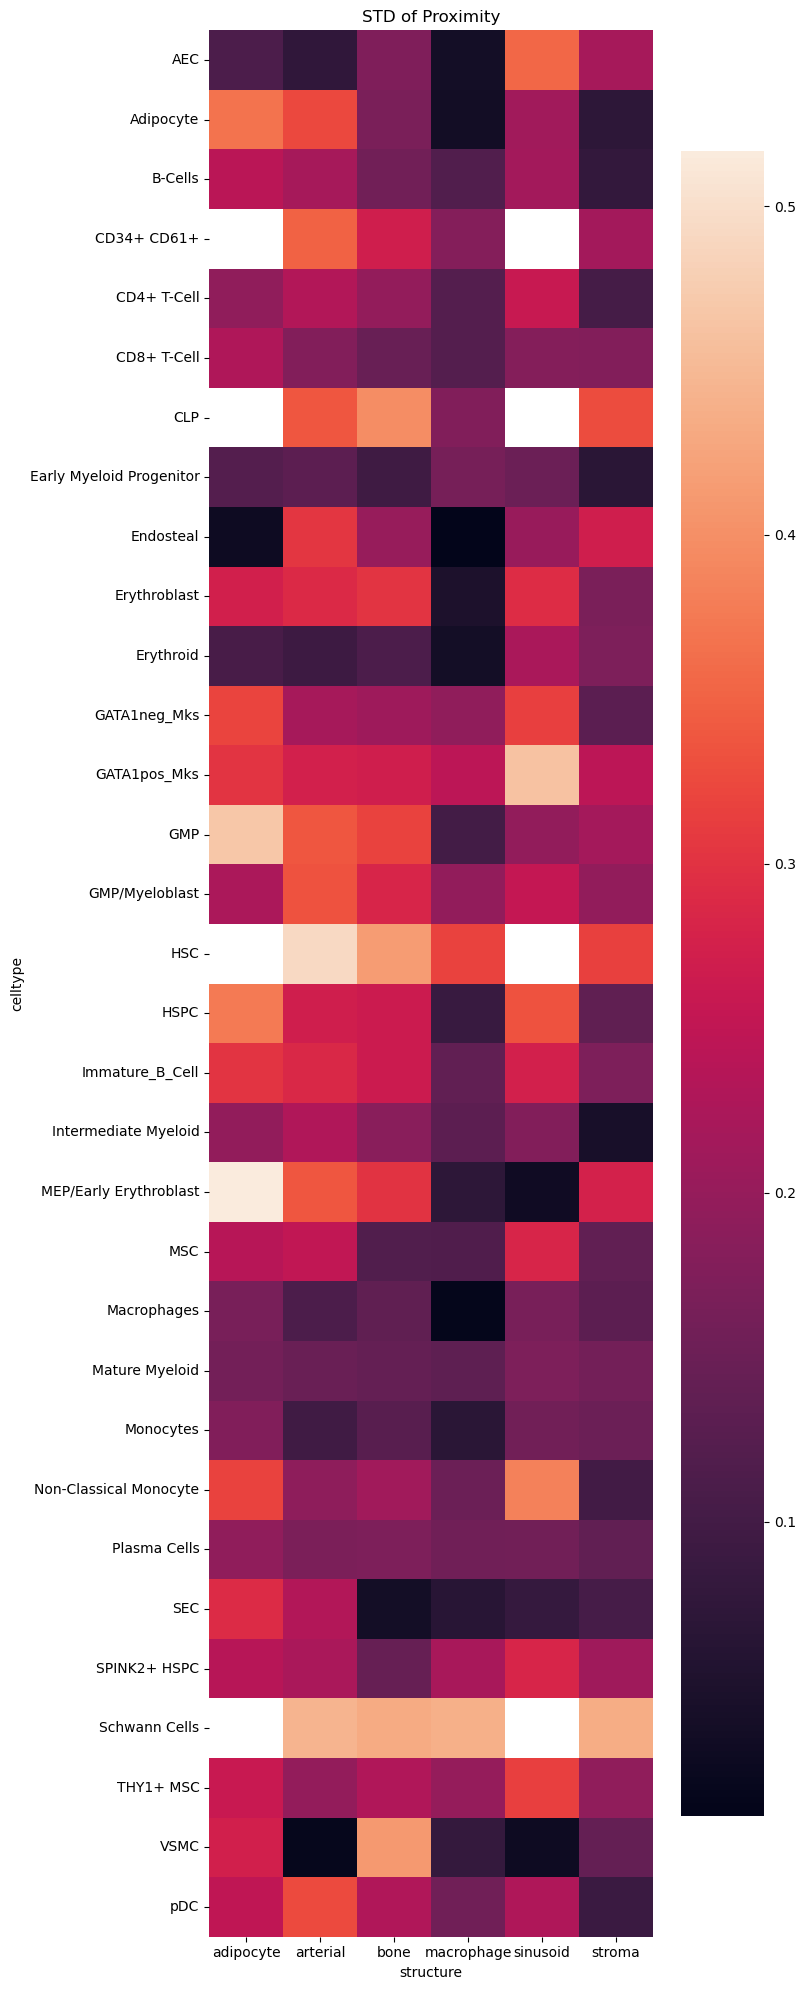

In [33]:
pivot_df_std = combined_df.pivot_table(index='structure', columns='celltype', values='normalized_rank', aggfunc=np.std)
# pivot_df = 1-pivot_df
# transpose the pivot table
pivot_df_std = pivot_df_std.T
plt.figure(figsize=(8, 20))
sns.heatmap(pivot_df_std, )
plt.title('STD of Proximity')
plt.tight_layout()
plt.savefig('result/structure_celltype_proximity_std.pdf')

pivot_df_std.to_csv('result/structure_celltype_proximity_std.csv')


In [43]:
# remove populations column
# combined_df = combined_df.drop(columns=['populations'])
combined_df['distance'] = combined_df['coefficients_2'].apply(lambda x: np.exp(x))
combined_df['mean_sample_structure'] = combined_df.groupby(by=['sample','structure'])['distance'].transform('mean')
combined_df['relative_distance'] = combined_df['distance'] / combined_df['mean_sample_structure']
combined_df['mean_sample_structure_coefficients_2'] = combined_df.groupby(by=['sample','structure'])['-coefficients_2'].transform('mean')
combined_df['relative_-coefficients_2'] = combined_df['-coefficients_2'] / combined_df['mean_sample_structure_coefficients_2']

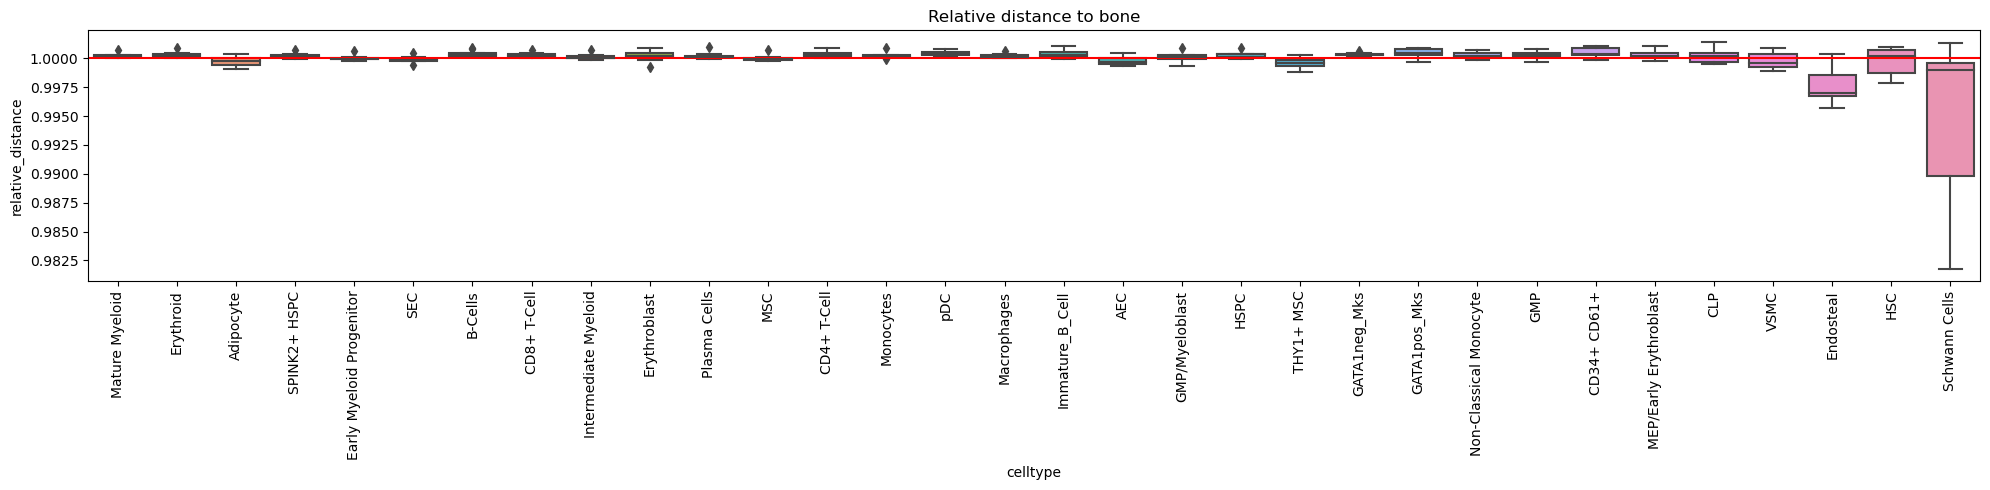

In [42]:
plt.figure(figsize=(20,5))
sns.boxplot(x='celltype', y='relative_distance', data=combined_df[combined_df['structure']=='bone'])
plt.title('Relative distance to bone')
# add y=1
plt.axhline(y=1, color='r', linestyle='-')
plt.xticks(rotation=90)
plt.tight_layout()


In [45]:
combined_df.to_csv('result/combined.csv')

In [44]:
combined_df

,sample,celltype,coefficients_1,coefficients_2,type,-coefficients_2,rank,normalized_rank,structure,distance,mean_sample_structure,relative_distance,mean_sample_structure_coefficients_2,relative_coefficients_2,relative_-coefficients_2
0,H26,Mature Myeloid,-8.169191,-0.007255,Healthy,0.007255,17.0,0.640000,adipocyte,0.992772,0.991794,1.000985,0.008247,-0.007315,0.879605
1,H26,Erythroid,-7.916054,-0.007296,Healthy,0.007296,16.0,0.600000,adipocyte,0.992731,0.991794,1.000944,0.008247,-0.007356,0.884607
2,H26,Adipocyte,-9.943024,-0.018002,Healthy,0.018002,2.0,0.040000,adipocyte,0.982160,0.991794,0.990285,0.008247,-0.018150,2.182672
3,H26,SPINK2+ HSPC,-12.740440,-0.010934,Healthy,0.010934,6.0,0.200000,adipocyte,0.989125,0.991794,0.997309,0.008247,-0.011025,1.325764
4,H26,Early Myeloid Progenitor,-9.369183,-0.012088,Healthy,0.012088,3.0,0.080000,adipocyte,0.987985,0.991794,0.996159,0.008247,-0.012188,1.465615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,H41,GATA1neg_Mks,-12.530949,-0.001133,Healthy,0.001133,26.0,0.862069,arterial,0.998867,0.998243,1.000626,0.001761,-0.001135,0.643672
306,H41,MEP/Early Erythroblast,-14.662351,-0.001664,Healthy,0.001664,8.0,0.241379,arterial,0.998337,0.998243,1.000095,0.001761,-0.001667,0.945055
307,H41,GATA1pos_Mks,-13.564670,-0.001702,Healthy,0.001702,7.0,0.206897,arterial,0.998299,0.998243,1.000057,0.001761,-0.001705,0.966724
308,H41,CLP,-15.209010,-0.001718,Healthy,0.001718,6.0,0.172414,arterial,0.998283,0.998243,1.000041,0.001761,-0.001721,0.975953


In [31]:
cls = 'neighbor'
combined_nb = None
for structure in structures:
    tmp_df = pd.read_csv('result/{}/{}/data.csv'.format(structure, cls), index_col=0)
    tmp_df['structure'] = structure
    
    if combined_nb is None:
        combined_nb = tmp_df
    else:
        combined_nb = combined_nb.append(tmp_df)
# change art to arterial in structure
combined_nb.loc[combined_nb['structure'] == 'art', 'structure'] = 'arterial'

/var/folders/pb/4g5084r100s8w6wd7bhb142r0000gn/T/ipykernel_1480/3986852984.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_nb = combined_nb.append(tmp_df)
/var/folders/pb/4g5084r100s8w6wd7bhb142r0000gn/T/ipykernel_1480/3986852984.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_nb = combined_nb.append(tmp_df)
/var/folders/pb/4g5084r100s8w6wd7bhb142r0000gn/T/ipykernel_1480/3986852984.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_nb = combined_nb.append(tmp_df)
/var/folders/pb/4g5084r100s8w6wd7bhb142r0000gn/T/ipykernel_1480/3986852984.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_

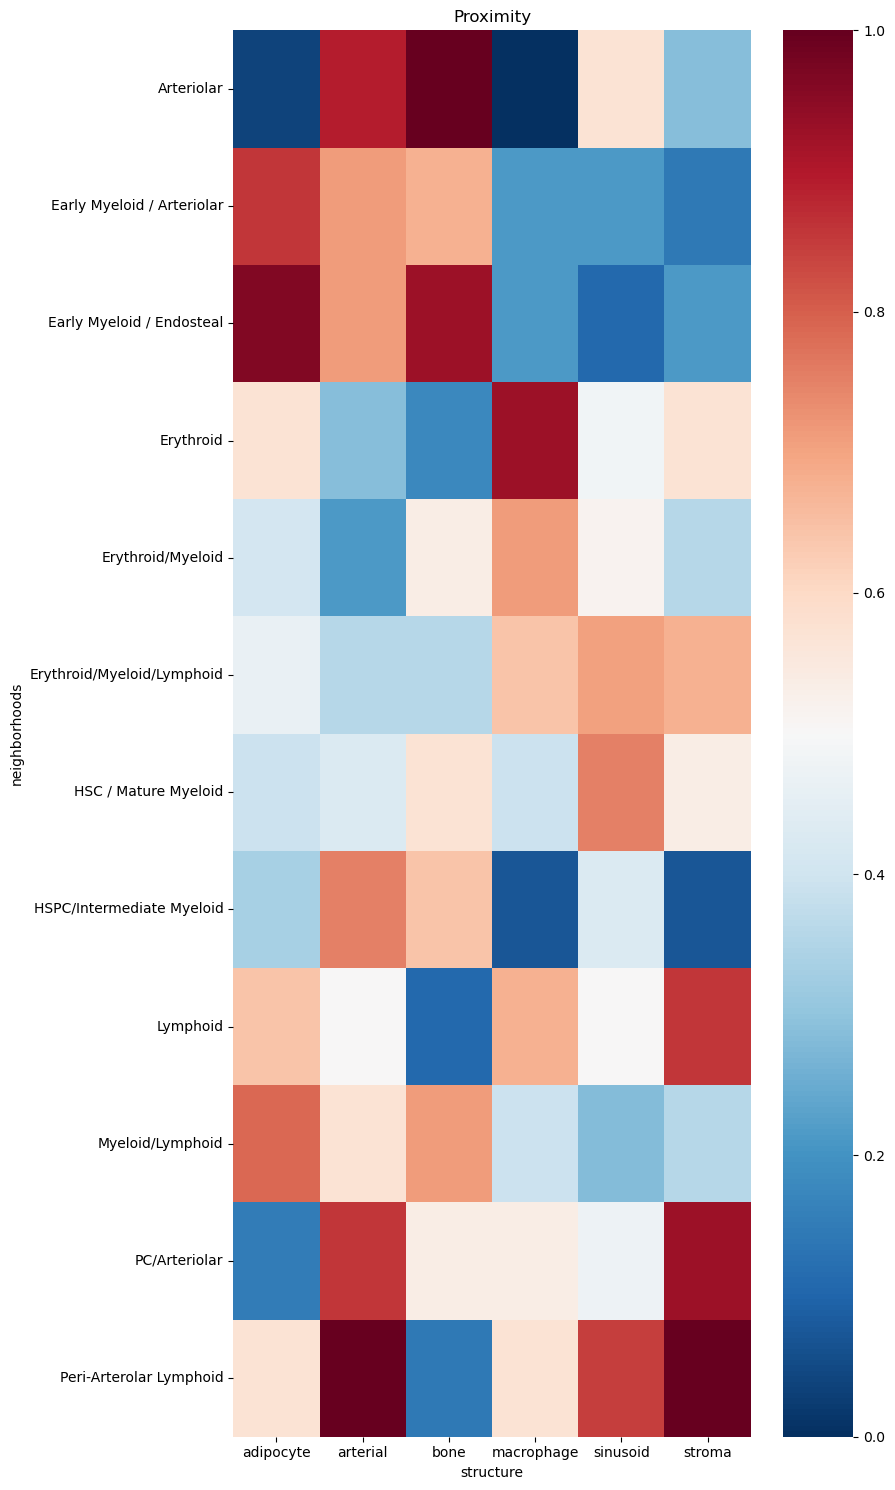

In [34]:
# create a pivot table (structure x celltype), value is the median of normalized_rank across all samples)
pivot_nb = combined_nb.pivot_table(index='structure', columns='neighborhoods', values='normalized_rank', aggfunc=np.median)
# replace NaN with mean of the row
# pivot_nb = pivot_nb.fillna(0.5)
pivot_nb = 1-pivot_nb
# transpose the pivot table
pivot_nb = pivot_nb.T
plt.figure(figsize=(9, 15))
sns.heatmap(pivot_nb, cmap='RdBu_r', vmin=0, vmax=1, center=0.5,)
plt.title('Proximity')
plt.tight_layout()
# plt.savefig('result/structure_neighborhood_proximity.pdf')
# pivot_nb.to_csv('result/structure_neighborhood_proximity.csv')


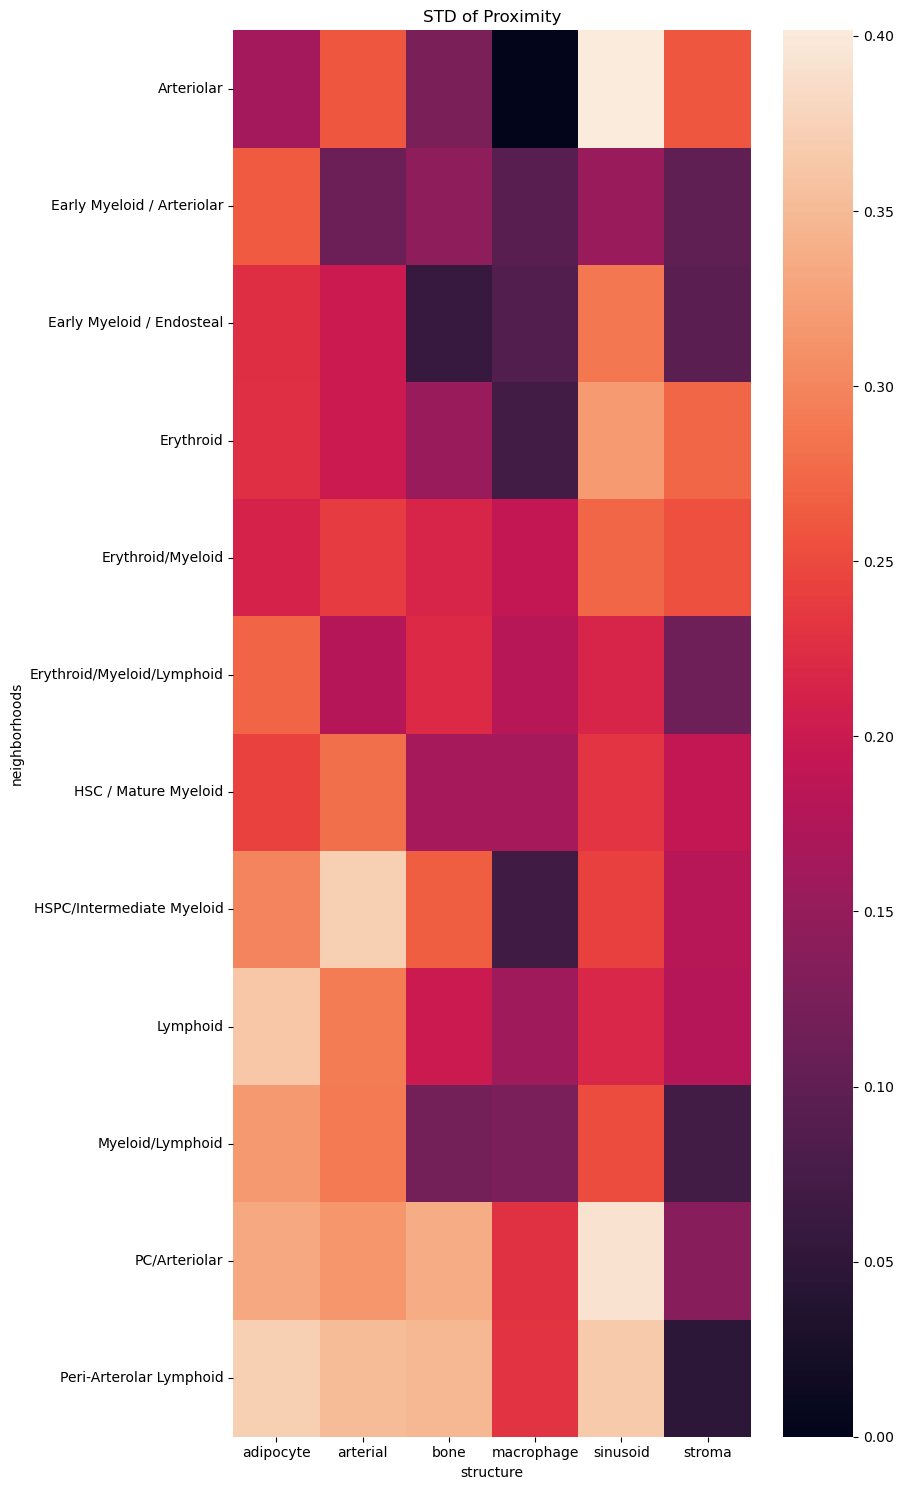

In [36]:
pivot_nb_std = combined_nb.pivot_table(index='structure', columns='neighborhoods', values='normalized_rank', aggfunc=np.std)
pivot_nb_std = pivot_nb_std.T
plt.figure(figsize=(9, 15))
sns.heatmap(pivot_nb_std, )
plt.title('STD of Proximity')
plt.tight_layout()
plt.savefig('result/structure_neighborhood_proximity_std.pdf')
pivot_nb_std.to_csv('result/structure_neighborhood_proximity_std.csv')

In [48]:
combined_nb['distance'] = combined_nb['coefficients_2'].apply(lambda x: np.exp(x))
combined_nb['mean_sample_structure'] = combined_nb.groupby(by=['sample','structure'])['distance'].transform('mean')
combined_nb['relative_distance'] = combined_nb['distance'] / combined_nb['mean_sample_structure']
combined_nb['mean_sample_structure_coefficients_2'] = combined_nb.groupby(by=['sample','structure'])['-coefficients_2'].transform('mean')
combined_nb['relative_-coefficients_2'] = combined_nb['-coefficients_2'] / combined_nb['mean_sample_structure_coefficients_2']
combined_nb = combined_nb.drop(columns=['populations'])

In [49]:
combined_nb

,sample,neighborhoods,coefficients_1,coefficients_2,type,-coefficients_2,rank,normalized_rank,structure,distance,mean_sample_structure,relative_distance,mean_sample_structure_coefficients_2,relative_-coefficients_2
0,H26,Arteriolar,-10.396318,-0.005394,Healthy,0.005394,13.0,0.857143,adipocyte,0.994621,0.991802,1.002842,0.008236,0.654880
1,H26,Erythroid,-8.606029,-0.008241,Healthy,0.008241,6.0,0.357143,adipocyte,0.991793,0.991802,0.999991,0.008236,1.000557
2,H26,Erythroid/Myeloid/Lymphoid,-8.188845,-0.008696,Healthy,0.008696,5.0,0.285714,adipocyte,0.991342,0.991802,0.999536,0.008236,1.055822
3,H26,Erythroid/Myeloid,-9.228324,-0.004832,Healthy,0.004832,14.0,0.928571,adipocyte,0.995179,0.991802,1.003405,0.008236,0.586704
4,H26,Erythroid/Myeloid,-9.369653,-0.007852,Healthy,0.007852,8.0,0.500000,adipocyte,0.992179,0.991802,1.000380,0.008236,0.953287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,H41,Erythroid/Myeloid,-9.172945,-0.001332,Healthy,0.001332,8.0,0.500000,arterial,0.998669,0.998537,1.000132,0.001464,0.909609
146,H41,Early Myeloid / Endosteal,-9.463675,-0.001713,Healthy,0.001713,3.0,0.142857,arterial,0.998289,0.998537,0.999751,0.001464,1.169822
147,H41,Peri-Arterolar Lymphoid,-10.301494,-0.002628,Healthy,0.002628,1.0,0.000000,arterial,0.997375,0.998537,0.998836,0.001464,1.795191
148,H41,Erythroid/Myeloid,-9.664197,-0.001519,Healthy,0.001519,5.0,0.285714,arterial,0.998482,0.998537,0.999945,0.001464,1.037733


In [50]:
combined_nb.to_csv('result/combined_neighbor.csv')

## structure to structure

In [60]:
sample_list = np.loadtxt('output/st_sample_list.txt', dtype=str)
coefficients_list_1 = np.loadtxt('output/st_coefficients_list_1.txt', dtype=float)
coefficients_list_2 = np.loadtxt('output/st_coefficients_list_2.txt', dtype=float)
structure_list_1 = np.loadtxt('output/st_structure_list_1.txt', dtype=str)
structure_list_2 = np.loadtxt('output/st_structure_list_2.txt', dtype=str)
distance_median_list = np.loadtxt('output/st_distance_median_list.txt', dtype=float)
distance_sd_list = np.loadtxt('output/st_distance_sd_list.txt', dtype=float)
pvalue_list = np.loadtxt('output/st_pvalue_list.txt', dtype=float)
iqr_list = np.loadtxt('output/st_iqr_list.txt', dtype=float)

# create a dataframe
df = pd.DataFrame({'sample': sample_list, 'coefficients_1': coefficients_list_1, 'coefficients_2': coefficients_list_2, 'structure_1': structure_list_1, 'structure_2': structure_list_2,
                   'distance_median': distance_median_list, 'distance_sd': distance_sd_list, 'pvalue': pvalue_list,
                   'distance_iqr': iqr_list})

df['structure_1'] = df['structure_1'].str.replace('art', 'arterial')
df['structure_2'] = df['structure_2'].str.replace('art', 'arterial')
df['-coefficients_2'] = -df['coefficients_2']

df['rank'] = df.groupby(by=['sample','structure_1'])['-coefficients_2'].rank(ascending=False)
df['normalized_rank'] = df.groupby('sample')['rank'].apply(lambda x: (x.rank()-1)/(len(x)-1))

# df['distance'] = df['coefficients_2'].apply(lambda x: np.exp(x))
# df['mean_sample_structure_1'] = df[df['structure_1']!=df['structure_2']].groupby(by=['sample','structure_1'])['distance'].transform('mean')
# df['relative_distance'] = df['distance'] / df['mean_sample_structure_1']
df

,sample,coefficients_1,coefficients_2,structure_1,structure_2,distance_median,distance_sd,pvalue,-coefficients_2,rank,normalized_rank
0,H26,-7.117511,-0.233675,adipocyte,adipocyte,2.236068,1.192842,0.00,0.233675,1.0,0.071429
1,H26,-12.172693,-0.007326,adipocyte,arterial,27.312608,4.173805,1.00,0.007326,5.0,0.757143
2,H26,-12.125974,0.005738,adipocyte,bone,80.050300,12.191314,1.00,-0.005738,6.0,0.928571
3,H26,-11.359751,-0.009538,adipocyte,macrophage,21.633308,5.959242,1.00,0.009538,2.0,0.242857
4,H26,-8.978577,-0.008222,adipocyte,sinusoid,22.649493,7.252014,1.00,0.008222,4.0,0.585714
...,...,...,...,...,...,...,...,...,...,...,...
351,H41,-9.661849,-0.034832,stroma,arterial,24.083189,6.697885,0.00,0.034832,1.0,0.071429
352,H41,-11.340358,-0.005023,stroma,bone,123.618299,29.474938,1.00,0.005023,6.0,0.928571
353,H41,-10.737134,-0.011905,stroma,macrophage,29.410882,10.162290,0.00,0.011905,5.0,0.757143
354,H41,-10.087692,-0.022274,stroma,sinusoid,36.681057,11.659450,0.08,0.022274,2.0,0.242857


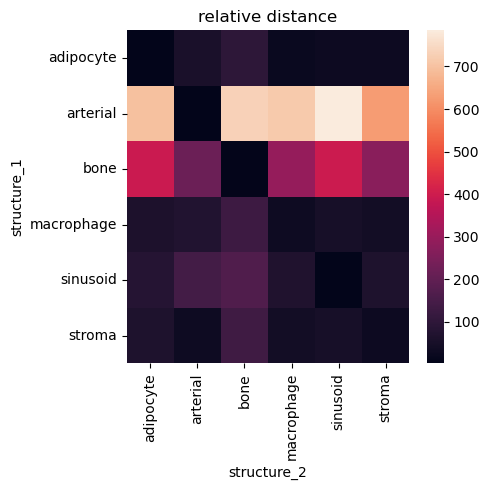

In [64]:
pivot_df = df.pivot_table(index='structure_1', columns='structure_2', values='distance_median', aggfunc=np.median)

plt.figure(figsize=(5, 5))
# pivot_df = 1-pivot_df

sns.heatmap(pivot_df)
# sns.heatmap(pivot_df,cmap='RdBu_r', vmin=0, vmax=1, center=0.5,)
# sns.heatmap(pivot_df, center=1,)
plt.title('relative distance')
plt.tight_layout()
# plt.savefig('result/structure_structure_rank.pdf')
# pivot_df.to_csv('result/structure_structure_rank.csv')

In [58]:
df.to_csv('result/combined_structure_v2.csv')

In [102]:
pivot_df

structure_2,adipocyte,arterial,bone,macrophage,sinusoid,stroma
structure_1,,,,,,
adipocyte,37.583242,1.001412,0.998928,1.009735,1.009594,1.008204
arterial,1.000608,3.669797,0.999889,1.000540,1.000498,1.000939
bone,0.997503,0.998603,13.844877,0.998125,0.998202,0.998185
macrophage,1.031308,1.036281,0.999755,61.739725,1.034466,1.089265
sinusoid,1.008843,1.000892,0.999354,1.007737,21.287817,1.008090
stroma,1.027569,1.164905,1.000649,1.088192,1.038675,55.611589


In [56]:
df

,sample,coefficients_1,coefficients_2,structure_1,structure_2,-coefficients_2,rank,normalized_rank,distance,mean_sample_structure_1,relative_distance
0,H26,-5.118793,-1.753102e+02,adipocyte,adipocyte,1.753102e+02,1.0,0.071429,7.307085e-77,NaN,NaN
1,H26,-7.373812,-5.713007e-03,adipocyte,arterial,5.713007e-03,4.0,0.585714,9.943033e-01,0.996495,0.997800
2,H26,-7.941906,7.182858e-03,adipocyte,bone,-7.182858e-03,6.0,0.928571,1.007209e+00,0.996495,1.010751
3,H26,-7.323488,-7.761048e-03,adipocyte,macrophage,7.761048e-03,2.0,0.242857,9.922690e-01,0.996495,0.995759
4,H26,-7.390965,-5.053436e-03,adipocyte,sinusoid,5.053436e-03,5.0,0.757143,9.949593e-01,0.996495,0.998459
...,...,...,...,...,...,...,...,...,...,...,...
253,H38,-27.302585,9.766612e-17,adipocyte,arterial,-9.766612e-17,5.0,0.800000,1.000000e+00,0.996048,1.003968
254,H38,-7.513579,2.217020e-03,adipocyte,bone,-2.217020e-03,6.0,1.000000,1.002219e+00,0.996048,1.006196
255,H38,-6.838913,-7.621096e-03,adipocyte,macrophage,7.621096e-03,3.0,0.400000,9.924079e-01,0.996048,0.996345
256,H38,-6.890927,-5.936208e-03,adipocyte,sinusoid,5.936208e-03,4.0,0.600000,9.940814e-01,0.996048,0.998025
